<a href="https://colab.research.google.com/github/Dr-Banana/CSE5544/blob/main/Zhang_10419_lab1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part One: Concept

**Data items represent:** The Rise of Partisanship in the U.S. House of Representative at year 2011

**Mark used for data items:** 0-dimensional points and 1-dimensional lines

**Data attributes:** Political parties, Agreement Value, Connection between members, cities

**Visual channels:** luminance,hue, position and size 


> Attribute political parties is encoded with color, position

> Attribute Agreement Value is encoded with lumination

> Attribute connection between memebers is encoded with size

> Attribute cities is encoded with text lables




**Data items represent:** Percentage of foreign students in higher education out of student population

**Mark used for data items:** 2-dimensional areas

**Data attributes:** Cities, non-Citizen Students percentage

**Visual channels:** luminance, position


> Attribute cities is encoded with position,shape

> Attribute non-Citizen Students percentage is encoded with colors(luminance) 





# Part Two: Programming

In [ ]:
import pandas as pd
import random
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import repeat

# Import the library, authenticate, and create the interface to Sheets.
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# access the google sheet and load it into pandas dataframe
#################### Do this only at the first time
wkbook = 'https://docs.google.com/spreadsheets/d/1HiVAuTr1miXHKCmxRDu_ZspUXttlRINN3ec2CvFHg1k/edit?usp=sharing'

wb = gc.open_by_url(wkbook)
sheet = wb.worksheet('Sheet1')
sheet_data = sheet.get_all_values()

df_data = pd.DataFrame(sheet_data)
# make row 0 into the column headers, then drop it
df_data.columns = df_data.iloc[0]
df_data.drop(df_data.index[0], inplace=True)

In [ ]:
# 1) Display the first 5 rows of the data
df_data.head(5)

,Country\year,Non-OECD Economies,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Argentina,Yes,220240.77,230413.76,234122.38,239560.14,243598.69,244499.37,256463.93,258303.62,262725.06,264637.84,280308.99,276902.60,269315.64,286381.63,298167.36,307492.67,321462.03,335854.13,331802.17,322554.23,300695.19,310314.53,310670.24,321011.89,322554.61,..,..,..,..,..
2,Australia,No,423672.23,423733.06,427426.08,428337.07,428818.22,437276.55,443928.27,456015.98,469751.52,476391.99,487777.76,495604.31,499190.49,500599.96,517726.51,524211.49,528038.42,534417.84,537262.31,540381.62,535549.22,537205.50,539511.06,530311.91,524709.40,533063.83,542287.87,549330.02,549731.94,545152.52
3,Austria,No,78420.49,82082.33,75469.27,75709.19,75958.30,79237.98,82452.59,82116.23,81432.85,79898.37,80129.43,84064.72,85815.06,91306.72,90985.23,92147.29,89728.78,86983.94,86440.21,79779.07,84336.72,82127.03,79432.38,79817.17,76238.67,78462.23,79471.01,81862.50,78627.64,79842.25
4,Belarus,Yes,139151.99,130840.89,120140.78,106923.60,89779.89,83442.94,84297.36,85109.98,86361.89,80057.93,79717.08,79870.11,78363.79,80448.44,84704.15,86798.69,90642.09,90117.01,92953.37,88814.49,90694.80,90342.30,91370.71,92264.23,91040.70,85975.45,87745.02,88542.20,89064.61,90115.70
5,Belgium,No,145719.49,148439.22,148039.15,146897.39,151497.12,153616.79,157323.93,148852.50,154021.16,147789.33,148882.93,147324.61,147412.69,147713.45,148554.79,145561.70,142720.48,139071.66,138980.22,126325.02,133633.52,123134.28,120385.71,120443.49,114732.00,118959.98,117689.18,117424.30,117894.74,116651.49


In [ ]:
# 2) Count the total numbers of rows and columns.
n_r = df_data.shape[0]
n_c = df_data.shape[1]
print("Number of rows is %d and number of columns is %d" % (n_r, n_c))

Number of rows is 62 and number of columns is 32


In [ ]:
# 3) List the unique “Non-OECD Economies” countries (the second column, Yes).
df_data[df_data["Non-OECD Economies"]=="Yes"]

,Country\year,Non-OECD Economies,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Argentina,Yes,220240.77,230413.76,234122.38,239560.14,243598.69,244499.37,256463.93,258303.62,262725.06,264637.84,280308.99,276902.60,269315.64,286381.63,298167.36,307492.67,321462.03,335854.13,331802.17,322554.23,300695.19,310314.53,310670.24,321011.89,322554.61,..,..,..,..,..
4,Belarus,Yes,139151.99,130840.89,120140.78,106923.60,89779.89,83442.94,84297.36,85109.98,86361.89,80057.93,79717.08,79870.11,78363.79,80448.44,84704.15,86798.69,90642.09,90117.01,92953.37,88814.49,90694.80,90342.30,91370.71,92264.23,91040.70,85975.45,87745.02,88542.20,89064.61,90115.70
6,Brazil,Yes,552640.82,574601.49,583848.35,596099.40,613905.50,638769.90,643708.82,668029.60,685872.35,702927.57,725162.14,744084.15,760963.10,778785.71,815887.21,830176.87,837355.38,843618.61,872592.78,858585.47,921055.10,954163.29,985944.61,1030985.67,1062897.04,1041676.99,1014702.38,..,..,..
7,Bulgaria,Yes,99978.08,81795.82,76218.38,75610.64,71519.55,72908.91,73249.27,70028.76,65922.19,58817.04,57864.27,60776.88,58130.23,62940.28,62109.50,62714.87,63377.10,67307.94,65996.59,57163.97,59796.37,65071.43,60087.12,54893.92,57987.87,61338.35,58800.91,61148.47,57281.77,55955.28
10,China (People's Republic of),Yes,..,..,..,..,4057617.00,..,..,..,..,..,..,..,..,..,..,8015000.00,..,..,..,..,10543331.00,..,11895765.00,..,12300200.00,..,..,..,..,..
13,Croatia,Yes,31387.29,24692.09,22771.97,22722.00,21818.72,22487.30,22994.82,24398.92,24509.48,25824.04,25563.46,26739.44,27793.26,29224.14,29263.64,29730.72,30081.35,31485.74,30506.12,28151.12,27752.97,27429.60,25612.64,24330.60,23475.54,23911.92,23999.92,24737.56,23536.28,23605.02
14,Cyprus,Yes,5571.03,6072.44,6521.87,6798.93,7049.13,6985.58,7335.59,7430.33,7764.27,8035.07,8308.59,8257.05,8485.66,8878.86,9078.74,9205.21,9460.79,9789.58,10006.34,9772.66,9444.39,9150.41,8617.65,7918.78,8294.18,8336.77,8783.93,8969.69,8811.43,8841.53
25,India,Yes,..,..,..,..,1214248.00,..,..,..,..,..,1523766.56,..,..,..,..,..,..,..,..,..,2100849.73,..,..,..,..,..,2839424.95,..,..,..
26,Indonesia,Yes,266818.39,292610.40,306828.59,318657.49,334191.21,..,..,..,..,..,554333.48,537949.00,545911.00,559139.00,583101.00,590736.00,610242.00,607947.00,629710.00,628562.00,685711.00,726262.00,757250.00,796579.00,864948.00,907334.00,883224.00,..,..,..
27,Iran,Yes,..,..,..,..,385433.30,..,..,..,..,..,483669.17,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


In [ ]:
# 4)List the top 5 countries (or regions after removing Total) with the highest emission levels in 2019.
df_data = df_data.replace('..',0)
df_data['2019'] = df_data['2019'].astype(float)
df_data_noTotal = df_data.drop(df_data[df_data['Country\\year']=="OECD - Total"].index)
df_data_noTotal.sort_values(by='2019',ascending=False).head(5)

,Country\year,Non-OECD Economies,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
46,OECD America,Yes,7638257.00,7573904.50,7713593.00,7843008.00,7981138.50,8077919.50,8337846.00,8442128.00,8521267.00,8559141.00,8786618.00,8655338.00,8722294.00,8808193.00,8944042.00,8968986.00,8916593.00,9083648.00,8885935.00,8374841.50,8601694.00,8465978.00,8232323.00,8436900.00,8496814.00,8363986.50,8200864.50,8174035.50,8375674.50,8264339.00
62,United States,No,6442650.63,6373621.14,6486343.84,6604349.89,6691822.83,6775860.25,6981165.38,7036508.04,7083269.27,7125399.03,7313616.49,7202956.51,7244301.89,7301363.18,7415471.11,7423031.03,7344462.85,7449616.03,7224648.98,6772000.07,6991106.34,6827402.42,6585907.77,6764669.11,6824956.71,6671112.07,6520337.84,6483291.33,6671449.40,6558345.18
44,OECD - Europe,No,5588408.50,5567812.00,5421059.00,5339287.00,5312786.50,5366711.50,5500390.00,5424047.50,5406203.00,5322327.50,5339734.00,5367127.00,5336262.00,5432447.50,5447102.50,5434862.50,5442541.00,5422156.50,5306798.50,4970453.50,5086109.00,4944478.00,4916111.50,4828424.50,4664077.00,4705281.00,4713299.50,4745996.00,4652157.50,4473145.50
18,European Union (28 countries),No,5657987.35,5554573.05,5385811.99,5285472.73,5249835.76,5294873.94,5408864.70,5312368.26,5271946.12,5166089.87,5155594.61,5206084.13,5172149.06,5260743.78,5262043.65,5226495.34,5215586.09,5164853.03,5046971.79,4675074.81,4779612.47,4626768.71,4568546.27,4471235.92,4293697.12,4325015.41,4302752.66,4317624.81,4223100.18,4057594.57
51,Russia,Yes,3158804.34,2997928.59,2519559.58,2382405.22,2120840.38,2068333.80,2017432.58,1899548.64,1867753.70,1897296.71,1891846.01,1926302.45,1903699.11,1936360.29,1947980.21,1965384.74,2024782.86,2022728.31,2057617.56,1921605.98,2013432.45,2070533.86,2095638.94,2037755.83,2037987.26,2035889.30,2037209.58,2071543.37,2133581.60,2119432.41


In [ ]:
# 5) List the total, mean (average), and standard deviation (std) of emissions by year
year_list = []
mean_list = []
total_list = []
std_list = []
for i in range(30):
  year = str(1990+i)
  year_list.append(year)
  total = df_data.replace('..',0)[year].astype('float').sum()
  total_list.append(total)
  mean = df_data.replace('..',0)[year].astype('float').mean()
  mean_list.append(mean)
  std = df_data.replace('..',0)[year].astype('float').std()
  std_list.append(std)
cal_data = {'total':total_list,'mean':mean_list,'std':std_list}
cal_data = pd.DataFrame(data=cal_data,index=year_list)
print(cal_data)

            total          mean           std
1990  56062862.55  9.042397e+05  2.446009e+06
1991  54988061.55  8.869042e+05  2.432374e+06
1992  54323355.54  8.761832e+05  2.431116e+06
1993  54172088.03  8.737434e+05  2.442641e+06
1994  60338689.25  9.732047e+05  2.491037e+06
1995  54444490.65  8.781369e+05  2.500393e+06
1996  55817408.74  9.002808e+05  2.570859e+06
1997  55704556.40  8.984606e+05  2.579174e+06
1998  55585713.61  8.965438e+05  2.578708e+06
1999  55445432.90  8.942812e+05  2.580054e+06
2000  59325847.20  9.568685e+05  2.621119e+06
2001  56682269.94  9.142302e+05  2.608154e+06
2002  56858711.78  9.170760e+05  2.619566e+06
2003  57732321.39  9.311665e+05  2.650125e+06
2004  58314717.53  9.405600e+05  2.677783e+06
2005  66437000.15  1.071565e+06  2.824367e+06
2006  58399701.82  9.419307e+05  2.669944e+06
2007  58925764.17  9.504156e+05  2.700167e+06
2008  57818562.76  9.325575e+05  2.639522e+06
2009  54493538.10  8.789280e+05  2.487739e+06
2010  69324600.86  1.118139e+06  2

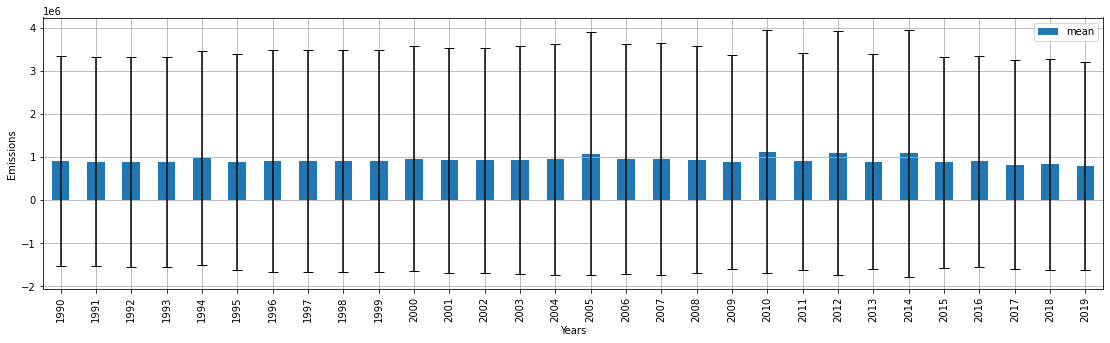

In [ ]:
# 6) Draw a bar chart to show the numbers (5)*1. The horizontal axis is country and the vertical axis is emissions(mean, std).
chart_data = {'year':year_list,'mean':mean_list}
chart_data = pd.DataFrame(data=chart_data,index=year_list)
chart_data.plot(kind="bar",figsize=(19, 5),yerr=std_list,capsize=5)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


Text(0, 0.5, 'Emissions')

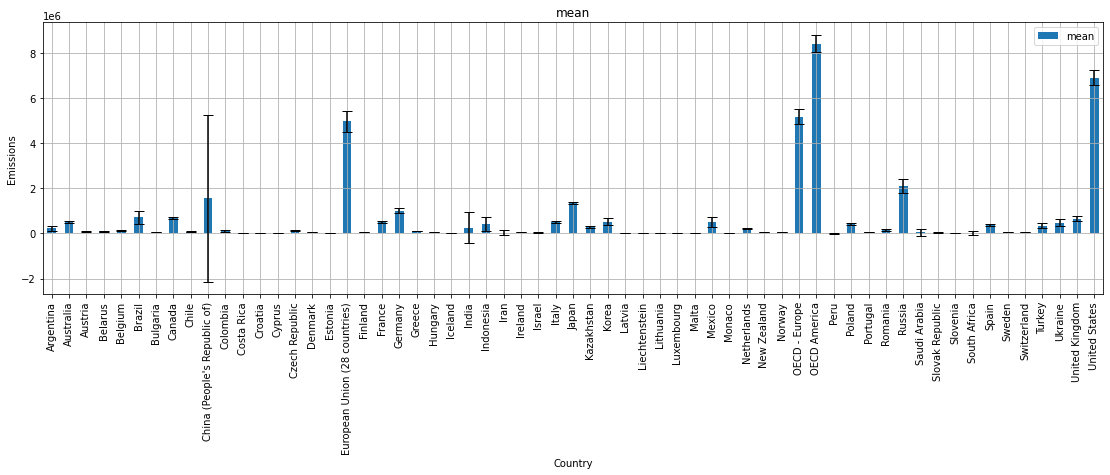

In [ ]:
# 7) List the countries’ emission average and standard deviation (std) in a bar chart
df_data_noTotal[year_list] = df_data_noTotal[year_list].astype(float) 

df_data_noTotal['mean'] = df_data_noTotal.mean(axis= 1)
df_data_noTotal['std'] = df_data_noTotal.std(axis= 1)

country_em_list = df_data_noTotal['mean'].tolist()
country_em_std_list = df_data_noTotal['std'].tolist()
country_list = df_data_noTotal['Country\\year'].tolist()

chart_data = {'mean':country_em_list}
chart_data = pd.DataFrame(data=chart_data,index=country_list)
chart_data.plot(kind = 'bar',figsize=(19, 5),subplots=True,yerr=country_em_std_list,capsize=5)
plt.grid()
plt.xlabel("Country")
plt.ylabel("Emissions")

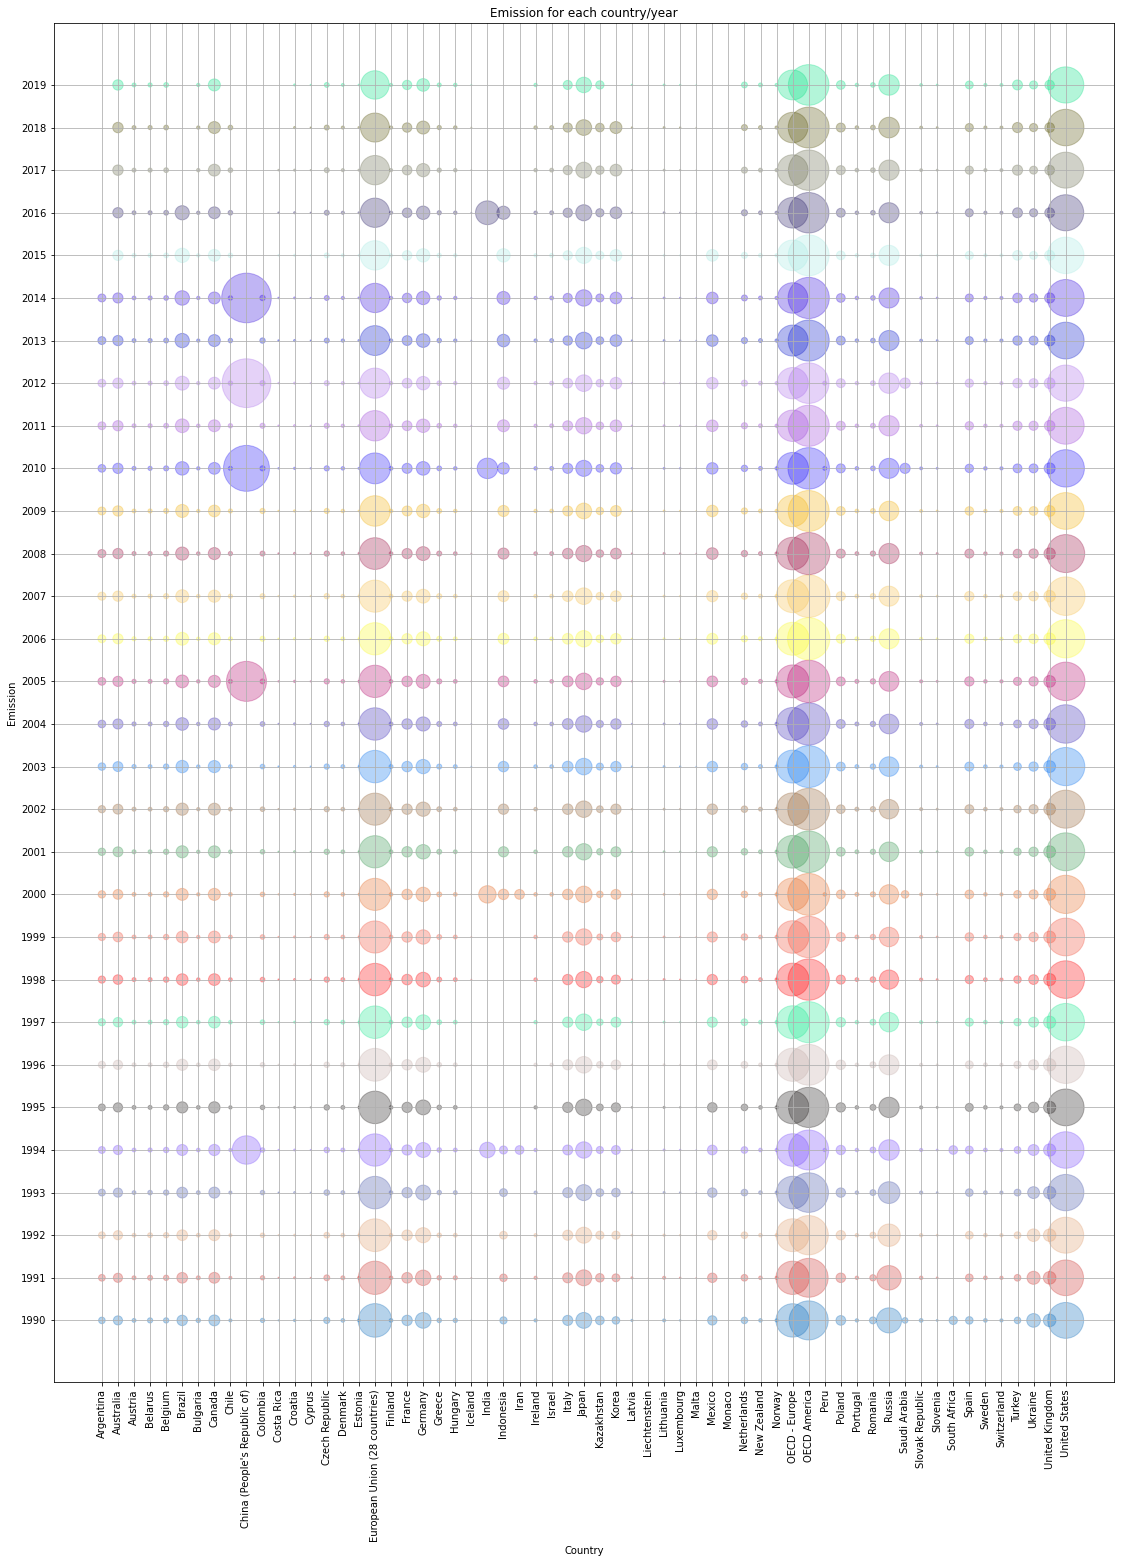

In [ ]:
# 8) Draw a scatter plot to show all the data and use the size of the circle to show the pollutant.
# =========another kind of plot=========
# fig, ax = plt.subplots()
# country_list = df_data_noTotal['Country\\year'].tolist()
# df = df_data_noTotal.drop(columns=['Non-OECD Economies','mean','std'])
# for col in df.drop(columns='Country\\year').columns:
#     country_em_list = df[col].tolist()
#     rgb = (random.random(), random.random(), random.random())
#     sizeList = []
#     for i in country_em_list:
#       sizeList.append((i/100000)*20)
#     pc = df.plot(kind = 'scatter',x = 'Country\\year', y=col,s=sizeList,c = [rgb],ax=ax,figsize=(19, 8),alpha=0.3,label=col)
# plt.xticks(rotation = 90)
# plt.ylabel('Emission')
# plt.xlabel('Country')
# plt.title('Emission for each country')
# lgnd = plt.legend(loc="lower left",bbox_to_anchor=(1, -0.05), scatterpoints=1, fontsize=10)
# for idx in range(30):
#   lgnd.legendHandles[idx]._sizes = [30]
# plt.show()

fig, ax = plt.subplots()
country_list = df_data_noTotal['Country\\year'].tolist()
df = df_data_noTotal.drop(columns=['Non-OECD Economies','mean','std'])
for col in df.drop(columns='Country\\year').columns:
    df['y'] = col
    country_em_list = df[col].tolist()
    rgb = (random.random(), random.random(), random.random())
    sizeList = []
    for i in country_em_list:
      sizeList.append((i/100000)*20)
    pc = df.plot(kind = 'scatter',x = 'Country\\year', y='y',s=sizeList,c = [rgb],ax=ax,figsize=(19, 25),alpha=0.3)
    df = df.drop(columns = 'y')
plt.xticks(rotation = 90)
plt.ylabel('Emission')
plt.xlabel('Country')
plt.title('Emission for each country/year')
plt.grid()
plt.show()